 ### Dataset Regresión Logística – Heart Disea

Contiene información de pacientes como edad, sexo, presión 
sanguínea, colesterol, etc.  la variable objetivo es la presencia 
de enfermedad cardíaca. 

### 1. los puntos de la actividad son 
1. Realizar un análisis exploratorio de los datos para identificar relaciones entre variables, valores atípicos, tendencias, etc.  
2. Preprocesar los datos limpiándolos, tratando valores faltantes y transformándolos según sea necesario.  
3. Seleccionar las características más relevantes para entrenar el modelo utilizando selección de características. 
4. Dividir el dataset en Train y Test para evaluar correctamente el modelo. 
5. Entrenar el modelo configurando los diferentes hiperparámetros. 
6. Evaluar el desempeño del modelo en el conjunto de Test con métricas como precisión, recall, F1-score, etc. 
7. Realizar las diferentes gráficas que permitan visualizar los resultados del modelo. 
8. Interpretar, analizar y documentar los resultados obtenidos.
  

In [ ]:
instalación de las librerias

In [3]:
pip install numpy pandas matplotlib seaborn scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [4]:
import numpy as np

In [5]:
import pandas as pd

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

In [52]:
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn.metrics import ConfusionMatrixDisplay


In [7]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

### Cargo los datos de Dataset Regresión Logística – Heart Disease Cleveland UCI

In [8]:
data = pd.read_csv('heart_cleveland_upload.csv')

 ### Realizar un análisis exploratorio de los datos para identificar 
 ### relaciones entre variables, valores atípicos, tendencias, etc.  

In [12]:
# realizamos la lectura de los 50 primeros datos para hacer el analisis exploratorio
data.head(60)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
0,69,1,0,160,234,1,2,131,0,0.1,1,1,0,0
1,69,0,0,140,239,0,0,151,0,1.8,0,2,0,0
2,66,0,0,150,226,0,0,114,0,2.6,2,0,0,0
3,65,1,0,138,282,1,2,174,0,1.4,1,1,0,1
4,64,1,0,110,211,0,2,144,1,1.8,1,0,0,0
5,64,1,0,170,227,0,2,155,0,0.6,1,0,2,0
6,63,1,0,145,233,1,2,150,0,2.3,2,0,1,0
7,61,1,0,134,234,0,0,145,0,2.6,1,2,0,1
8,60,0,0,150,240,0,0,171,0,0.9,0,0,0,0
9,59,1,0,178,270,0,2,145,0,4.2,2,0,2,0


In [10]:
#Desccrpción de los datos
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
count,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000
mean,54.542088,0.676768,2.158249,131.693603,247.350168,0.144781,0.996633,149.599327,0.326599,1.055556,0.602694,0.676768,0.835017,0.461279
std,9.049736,0.468500,0.964859,17.762806,51.997583,0.352474,0.994914,22.941562,0.469761,1.166123,0.618187,0.938965,0.956690,0.499340
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,2.000000,120.000000,211.000000,0.000000,0.000000,133.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,56.000000,1.000000,2.000000,130.000000,243.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,0.000000,0.000000
75%,61.000000,1.000000,3.000000,140.000000,276.000000,0.000000,2.000000,166.000000,1.000000,1.600000,1.000000,1.000000,2.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,3.000000,2.000000,1.000000


### Basado en información sobre emfermedades cardicas ningun dato esta fuera de las posibilidades

### 2. Preprocesar los datos limpiándolos, tratando valores faltantes y transformándolos según sea necesario.  

Text(0.5, 1.0, 'Identificación de Datos Faltantes y Atípicos')

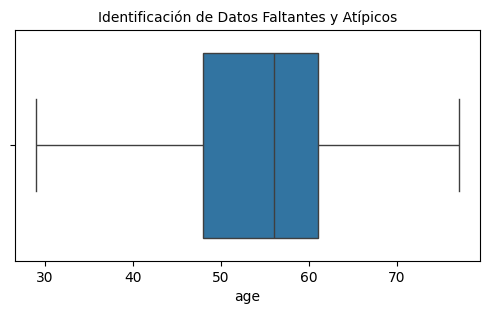

In [15]:
#Identificación de Datos Faltantes y Atípicos

plt.figure(figsize=(6, 3))
sns.boxplot(x=data['age' ])
plt.title('Identificación de Datos Faltantes y Atípicos', fontsize=10 )

Text(0.5, 1.0, 'Identificación de Datos Faltantes y Atípicos')

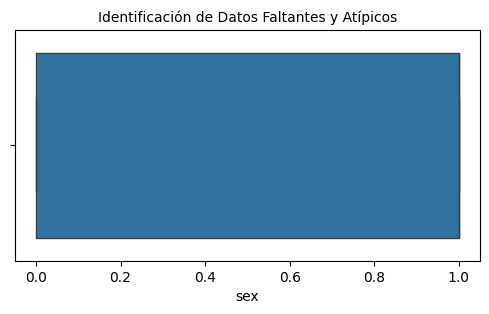

In [16]:
#Identificación de Datos Faltantes y Atípicos

plt.figure(figsize=(6, 3))
sns.boxplot(x=data['sex' ])
plt.title('Identificación de Datos Faltantes y Atípicos', fontsize=10 )

Text(0.5, 1.0, 'Identificación de Datos Faltantes y Atípicos')

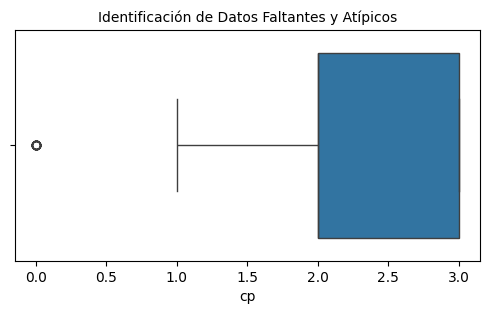

In [17]:
#Identificación de Datos Faltantes y Atípicos

plt.figure(figsize=(6, 3))
sns.boxplot(x=data['cp' ])
plt.title('Identificación de Datos Faltantes y Atípicos', fontsize=10 )

Text(0.5, 1.0, 'Identificación de Datos Faltantes y Atípicos')

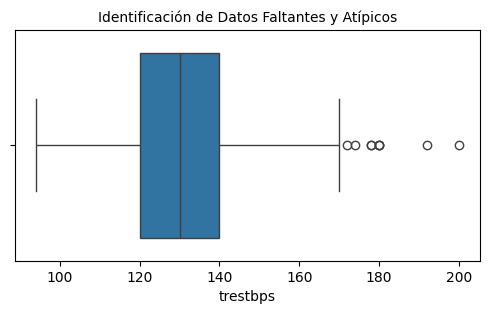

In [18]:
#Identificación de Datos Faltantes y Atípicos

plt.figure(figsize=(6, 3))
sns.boxplot(x=data['trestbps' ])
plt.title('Identificación de Datos Faltantes y Atípicos', fontsize=10 )

Text(0.5, 1.0, 'Identificación de Datos Faltantes y Atípicos')

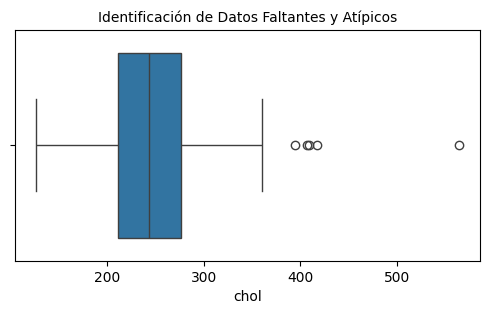

In [19]:
#Identificación de Datos Faltantes y Atípicos

plt.figure(figsize=(6, 3))
sns.boxplot(x=data['chol' ])
plt.title('Identificación de Datos Faltantes y Atípicos', fontsize=10 )

Text(0.5, 1.0, 'Identificación de Datos Faltantes y Atípicos')

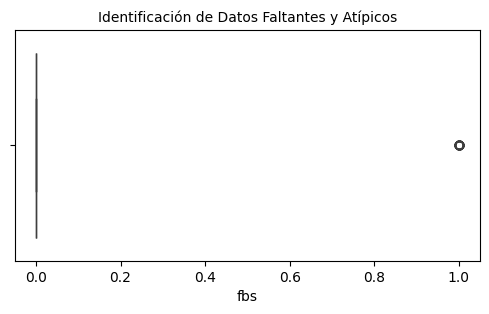

In [20]:
#Identificación de Datos Faltantes y Atípicos

plt.figure(figsize=(6, 3))
sns.boxplot(x=data['fbs' ])
plt.title('Identificación de Datos Faltantes y Atípicos', fontsize=10 )

Text(0.5, 1.0, 'Identificación de Datos Faltantes y Atípicos')

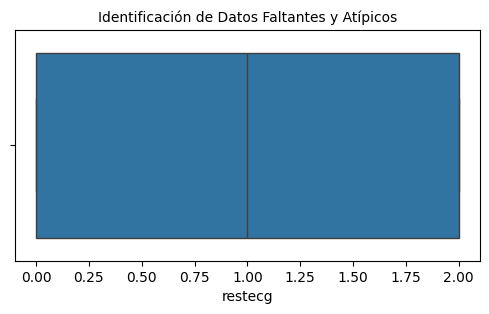

In [23]:
#Identificación de Datos Faltantes y Atípicos

plt.figure(figsize=(6, 3))
sns.boxplot(x=data['restecg' ])
plt.title('Identificación de Datos Faltantes y Atípicos', fontsize=10 )

Text(0.5, 1.0, 'Identificación de Datos Faltantes y Atípicos')

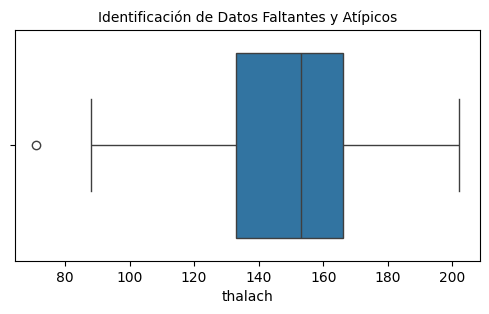

In [25]:
#Identificación de Datos Faltantes y Atípicos

plt.figure(figsize=(6, 3))
sns.boxplot(x=data['thalach' ])
plt.title('Identificación de Datos Faltantes y Atípicos', fontsize=10 )

Text(0.5, 1.0, 'Identificación de Datos Faltantes y Atípicos')

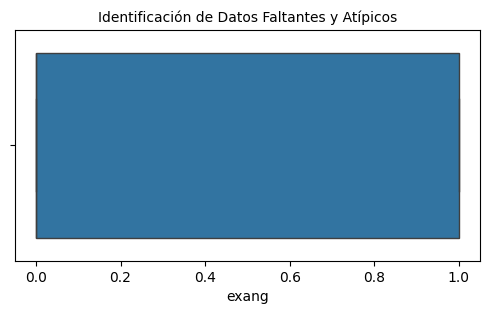

In [26]:
#Identificación de Datos Faltantes y Atípicos

plt.figure(figsize=(6, 3))
sns.boxplot(x=data['exang' ])
plt.title('Identificación de Datos Faltantes y Atípicos', fontsize=10 )

Text(0.5, 1.0, 'Identificación de Datos Faltantes y Atípicos')

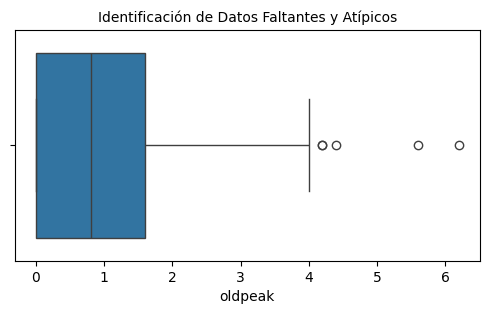

In [27]:
#Identificación de Datos Faltantes y Atípicos

plt.figure(figsize=(6, 3))
sns.boxplot(x=data['oldpeak' ])
plt.title('Identificación de Datos Faltantes y Atípicos', fontsize=10 )

Text(0.5, 1.0, 'Identificación de Datos Faltantes y Atípicos')

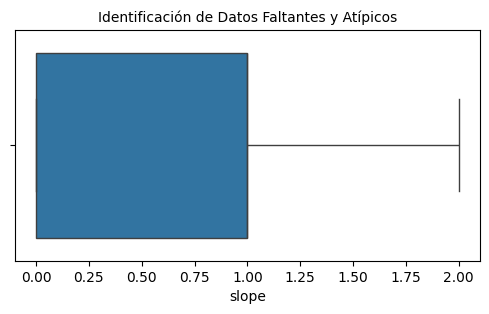

In [28]:
#Identificación de Datos Faltantes y Atípicos

plt.figure(figsize=(6, 3))
sns.boxplot(x=data['slope' ])
plt.title('Identificación de Datos Faltantes y Atípicos', fontsize=10 )

Text(0.5, 1.0, 'Identificación de Datos Faltantes y Atípicos')

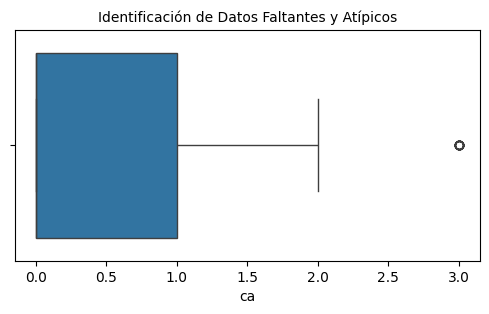

In [29]:
#Identificación de Datos Faltantes y Atípicos

plt.figure(figsize=(6, 3))
sns.boxplot(x=data['ca' ])
plt.title('Identificación de Datos Faltantes y Atípicos', fontsize=10 )

Text(0.5, 1.0, 'Identificación de Datos Faltantes y Atípicos')

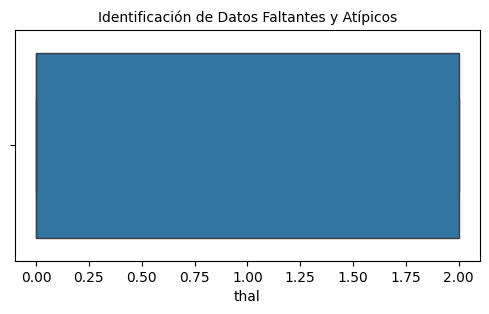

In [30]:
#Identificación de Datos Faltantes y Atípicos

plt.figure(figsize=(6, 3))
sns.boxplot(x=data['thal' ])
plt.title('Identificación de Datos Faltantes y Atípicos', fontsize=10 )

Text(0.5, 1.0, 'Identificación de Datos Faltantes y Atípicos')

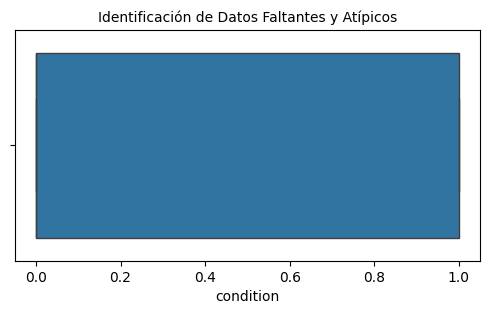

In [31]:
#Identificación de Datos Faltantes y Atípicos

plt.figure(figsize=(6, 3))
sns.boxplot(x=data['condition' ])
plt.title('Identificación de Datos Faltantes y Atípicos', fontsize=10 )

### Como vemos los valores mas atipicos son viables ya que no presenta un cambio tan extremo

In [32]:
#Revisión del tipo de datos y datos faltantes

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297 entries, 0 to 296
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        297 non-null    int64  
 1   sex        297 non-null    int64  
 2   cp         297 non-null    int64  
 3   trestbps   297 non-null    int64  
 4   chol       297 non-null    int64  
 5   fbs        297 non-null    int64  
 6   restecg    297 non-null    int64  
 7   thalach    297 non-null    int64  
 8   exang      297 non-null    int64  
 9   oldpeak    297 non-null    float64
 10  slope      297 non-null    int64  
 11  ca         297 non-null    int64  
 12  thal       297 non-null    int64  
 13  condition  297 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 32.6 KB


### 3. Seleccionar las características más relevantes para entrenar el 
###    modelo utilizando selección de características. 

In [33]:
#Total de perssonas con problemas cardiacos
data['condition'].value_counts()

condition
0    160
1    137
Name: count, dtype: int64

In [34]:
data[['condition']].head(60)

,condition
0,0
1,0
2,0
3,1
4,0
5,0
6,0
7,1
8,0
9,0


In [36]:
# Porcentaje de datos para entrenamiento (train) = 75% , y para prueba (test) = 25%

# Se crean variables X y Y para almacenar la información del entrenamiento

X = data.drop('condition', axis=1) # Se cargan los datos de train sin los datos de la columna Diabetico
Y = data['condition' ] # Se cargan Los datos de train con los datos de la la columna Diabetico

#La función train_test_split crea una división de un conjunto de datos en dos bloques uno de entrenamiento y otro de prueba (train and test)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, stratify=Y, random_state= 0)

In [40]:
print(X_train)

     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
234   56    0   3       200   288    1        2      133      1      4.0   
82    66    0   2       146   278    0        2      152      0      0.0   
36    56    1   1       120   240    0        0      169      0      0.0   
237   56    1   3       132   184    0        2      105      1      2.1   
133   47    1   2       108   243    0        0      152      0      0.0   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
291   40    1   3       110   167    0        2      114      1      2.0   
195   61    0   3       130   330    0        2      169      0      0.0   
170   65    0   3       150   225    0        2      114      0      1.0   
135   46    0   2       142   177    0        2      160      1      1.4   
293   39    1   3       118   219    0        0      140      0      1.2   

     slope  ca  thal  
234      2   2     2  
82       1   1     0  
36       2   0    

In [41]:
print(Y_train)

234    1
82     0
36     0
237    1
133    1
      ..
291    1
195    1
170    1
135    0
293    1
Name: condition, Length: 222, dtype: int64


### 5. Entrenar el modelo configurando los diferentes 
### hiperparámetros. 

In [42]:
# Construir el modelo de regresión logística

modelo_regresion = LogisticRegression(solver = "liblinear") # liblinear es una libreria para resolver problemas lineales de clasificacion y regresion
modelo_regresion.fit (X_train , Y_train)

# Crea el modelo de prediccion
Prediccion = modelo_regresion.predict(X_test) # la función predict predice los valores a partir del conjunto de datos de validación

In [43]:
print(Y_test)

185    1
157    1
110    0
39     0
198    1
      ..
278    0
163    1
137    0
33     1
246    1
Name: condition, Length: 75, dtype: int64


In [45]:
print(Prediccion)

[1 1 0 0 1 0 1 0 0 1 0 1 1 1 1 1 0 0 0 1 0 1 1 1 0 0 0 0 0 1 0 1 1 0 0 0 0
 0 1 0 0 0 1 1 1 1 1 0 1 1 0 1 0 0 0 0 0 1 1 1 1 0 0 0 1 0 0 1 0 0 0 1 0 0
 1]


### 6. Evaluar el desempeño del modelo en el conjunto de Test con 
### métricas como precisión, recall, F1-score, etc. 

In [50]:
# Desempeño del modelo de regresión

print(classification_report(Y_test,Prediccion))

              precision    recall  f1-score   support

           0       0.88      0.90      0.89        40
           1       0.88      0.86      0.87        35

    accuracy                           0.88        75
   macro avg       0.88      0.88      0.88        75
weighted avg       0.88      0.88      0.88        75



### 7. Realizar las diferentes gráficas que permitan visualizar los 
### resultados del modelo. 

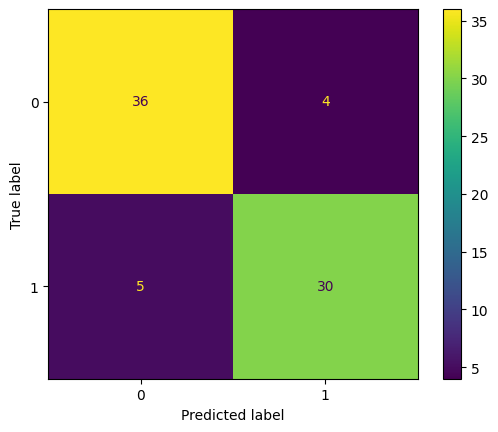

In [53]:
#Matrix de Confusión del modelo

cm=confusion_matrix(Y_test, Prediccion)
disp=metrics.ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()



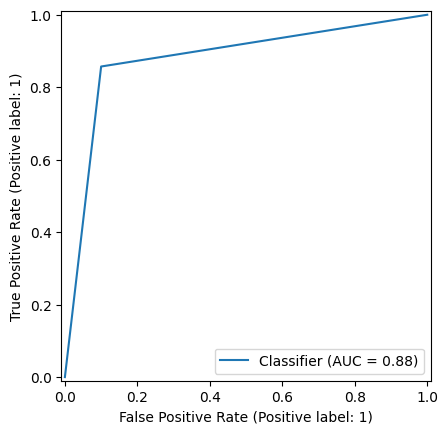

In [54]:
# Curva de precisón del modelo

from sklearn.metrics import RocCurveDisplay
RocCurveDisplay. from_predictions(Y_test, Prediccion)
plt.show()

### 8. Interpretar, analizar y documentar los resultados obtenidos. 

Analizaré los resultados del modelo de predicción de enfermedades cardíacas de manera detallada:
Datos del Dataset:
Total de registros: 297 pacientes
Variables: 14 columnas (13 predictoras y 1 objetivo)
Distribución de la variable objetivo (condition):
160 pacientes sin problemas cardíacos (54%)
137 pacientes con problemas cardíacos (46%)
Muestra relativamente balanceada
Preparación del Modelo:
División de datos: 75% entrenamiento (222 registros) y 25% prueba (75 registros)
Se utilizó regresión logística con solver "liblinear"
Estratificación aplicada para mantener la proporción de clases
Resultados del Modelo:
Precisión global (accuracy): 88%
Para pacientes sin problemas cardíacos (clase 0):
Precisión: 88% - De los que predijo sin problemas, acertó en el 88%
Recall: 90% - Identificó correctamente el 90% de los casos realmente sin problemas
F1-score: 89% - Media armónica entre precisión y recall
Para pacientes con problemas cardíacos (clase 1):
Precisión: 88% - De los que predijo con problemas, acertó en el 88%
Recall: 86% - Identificó correctamente el 86% de los casos realmente con problemas
F1-score: 87% - Media armónica entre precisión y recall
Análisis de la Matriz de Confusión:
Verdaderos Negativos (VN): 36 pacientes correctamente identificados sin problemas cardíacos
Falsos Positivos (FP): 4 pacientes incorrectamente clasificados como con problemas
Falsos Negativos (FN): 5 pacientes con problemas no detectados
Verdaderos Positivos (VP): 30 pacientes correctamente identificados con problemas cardíacos
El modelo muestra un buen equilibrio entre la detección de casos positivos y negativos
Tasa de falsos negativos relativamente baja (5 casos), lo cual es importante en contexto médico
AUC de 0.88 indica una buena capacidad discriminativa del modelo
El modelo muestra un rendimiento robusto y balanceado
Alta precisión general (88%) en la predicción de problemas cardíacos
Bajo número de falsos negativos, crucial en diagnósticos médicos
Rendimiento similar para ambas clases, indicando un modelo bien balanceado
